In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/User/Desktop/Data Visualisaion/weather-check.csv")

In [44]:
df.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [45]:
df.describe(include = 'object')

,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
count,928,928,928,928,928,928,928,928
unique,2,9,122,5,5,3,12,10
top,Yes,The default weather app on your phone,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
freq,746,213,753,362,278,527,169,185


### Do people check a daily weather report (groubed by age)?

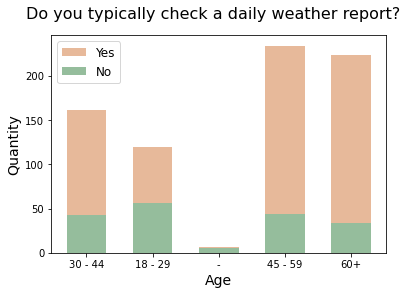

In [46]:
plt.hist(df.loc[df['Do you typically check a daily weather report?']== 'Yes']['Age'], color = '#e7b99a', bins= range(0,6), rwidth = 0.6, align = 'left')
plt.hist(df.loc[df['Do you typically check a daily weather report?']== 'No']['Age'], color = '#95bd9c', bins = range(0,6), rwidth = 0.6, align = 'left')
plt.xlabel('Age', size = 14)
plt.ylabel('Quantity', size = 14)
plt.legend(['Yes', 'No'], fontsize=12)
plt.suptitle('Do you typically check a daily weather report?', size = 16)
plt.show()

As we see we have a little data where the age is not defined... We may delete these rows for a better plot.

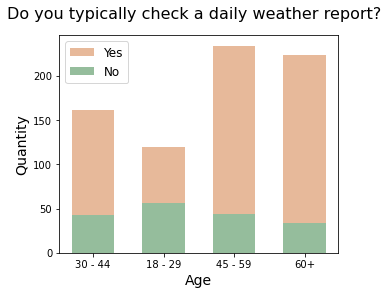

In [5]:
df1 = df.drop(df[df['Age'] == '-'].index)
plt.figure(figsize=(5,4))
plt.hist(df1.loc[df['Do you typically check a daily weather report?']== 'Yes']['Age'], color = '#e7b99a', bins= range(0,5), rwidth = 0.6, align = 'left')
plt.hist(df1.loc[df['Do you typically check a daily weather report?']== 'No']['Age'], color = '#95bd9c', bins = range(0,5), rwidth = 0.6, align = 'left')
plt.xlabel('Age', size = 14)
plt.ylabel('Quantity', size = 14)
plt.legend(['Yes', 'No'], fontsize=12)
plt.suptitle('Do you typically check a daily weather report?', size = 16)
plt.show()

##### Above we see that the groups of ages 45-59 and 60+ check the daily weather report more than the other groups.
### We check who are dominant among these people : 'Females' or 'Males'?

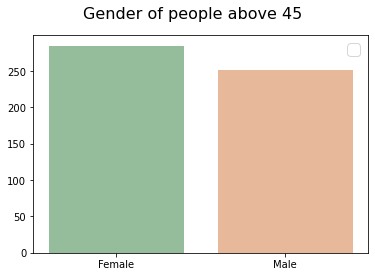

In [51]:
df_yes = df[(df['Age'] == '45 - 59') | (df['Age'] == '60+')]
c = ['#95bd9c','#e7b99a']
df_sex = df_yes.groupby(df_yes.iloc[:,6]).size()
x = ['Female', 'Male']
y = [df_sex[0] ,df_sex[1]]
handles =[df_sex[0]/(df_sex[0]+df_sex[1]),df_sex[1]/(df_sex[0]+df_sex[1])]
plt.legend(handles, fontsize = 16)
plt.bar(x,y,color = c)
plt.suptitle('Gender of people above 45 ', size = 16)
plt.show()

As we see there is no big difference...

### If people had a smartwatch how likely or unlikely would they be to check the weather on that device in each region?

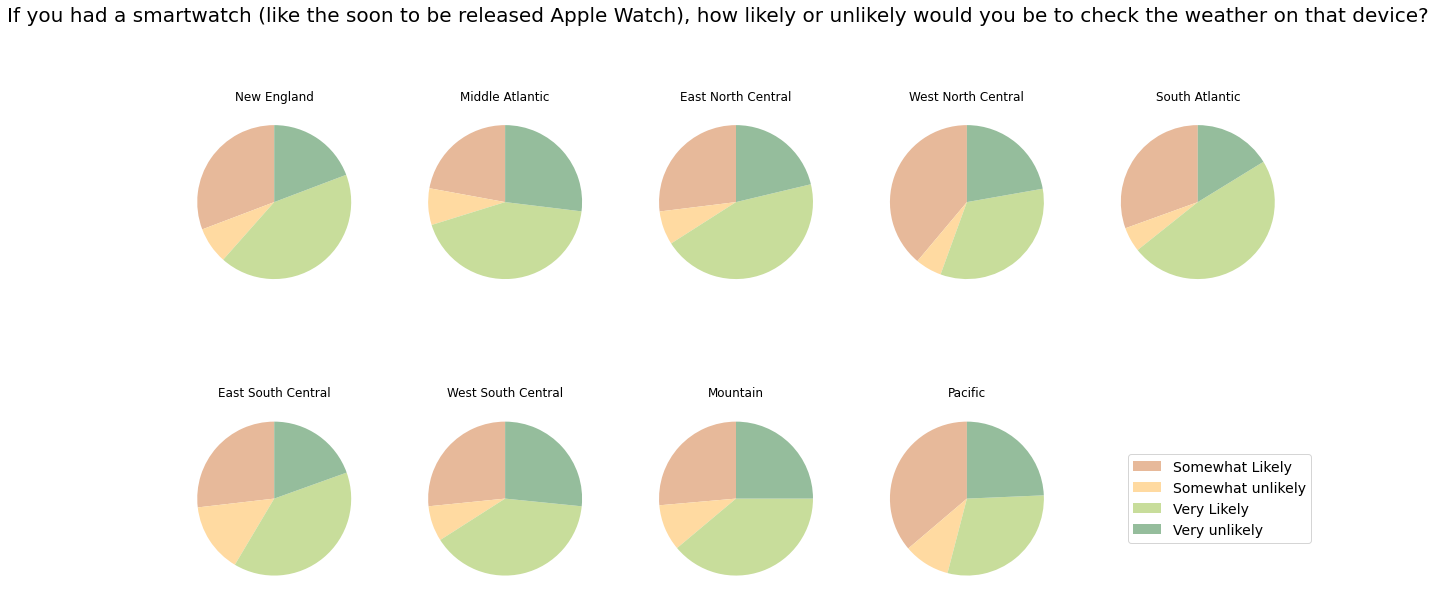

In [3]:
fig, axs = plt.subplots(2,5,figsize=(20,10))
color = ['#e7b99a','#ffdaa1', '#c8dd9b','#95bd9c']
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1
labels = ["Somewhat Likely", "Somewhat unlikely", "Very Likely", "Very unlikely"]
dfNE = df.loc[df['US Region'] == 'New England'].groupby(df.iloc[:,4]).size()
axs[0, 0].pie(df.loc[df['US Region'] == 'New England'].groupby(df.iloc[:,4]).size(),startangle = 90, colors = color)
axs[0,0].set_title('New England')
axs[0, 1].pie(df.loc[df['US Region'] == 'Middle Atlantic'].groupby(df.iloc[:,4]).size(),startangle = 90, colors = color)
axs[0,1].set_title('Middle Atlantic')
axs[0, 2].pie(df.loc[df['US Region'] == 'East North Central'].groupby(df.iloc[:,4]).size(),startangle = 90, colors = color)
axs[0,2].set_title('East North Central')
axs[0, 3].pie(df.loc[df['US Region'] == 'West North Central'].groupby(df.iloc[:,4]).size(),startangle = 90, colors = color)
axs[0,3].set_title('West North Central')
axs[0, 4].pie(df.loc[df['US Region'] == 'South Atlantic'].groupby(df.iloc[:,4]).size(),startangle = 90, colors = color)
axs[0,4].set_title('South Atlantic')
axs[1, 0].pie(df.loc[df['US Region'] == 'East South Central'].groupby(df.iloc[:,4]).size(),startangle = 90, colors = color)
axs[1,0].set_title('East South Central')
axs[1, 1].pie(df.loc[df['US Region'] == 'West South Central'].groupby(df.iloc[:,4]).size(),startangle = 90, colors = color)
axs[1,1].set_title('West South Central')
axs[1, 2].pie(df.loc[df['US Region'] == 'Mountain'].groupby(df.iloc[:,4]).size(),startangle = 90, colors = color)
axs[1,2].set_title('Mountain')
axs[1, 3].pie(df.loc[df['US Region'] == 'Pacific'].groupby(df.iloc[:,4]).size(),startangle = 90, colors = color)
axs[1,3].set_title('Pacific')
axs[1, 4].pie(df.loc[df['US Region'] == '-'].groupby(df.iloc[:,4]).size(),startangle = 90, colors = color)
axs[1,4].set_title('-')
fig.delaxes(axs[1][4])
plt.legend(labels, fontsize = 14, loc='center left', bbox_to_anchor=(1.3, 0.5))
fig.suptitle('If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?',size=20)
plt.show()


### How do people check the weather?

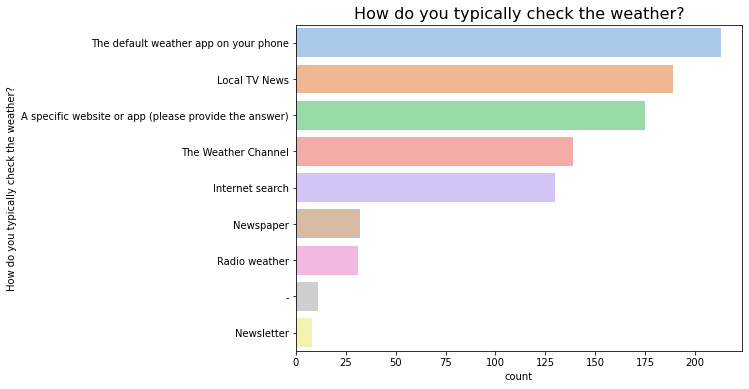

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(y ='How do you typically check the weather?', data = df, 
              order = df['How do you typically check the weather?'].value_counts().index, palette="pastel")
sns.color_palette("crest", as_cmap=True)

plt.title('How do you typically check the weather?', size = 16)
plt.show()

We eliminate the rows with no answer...

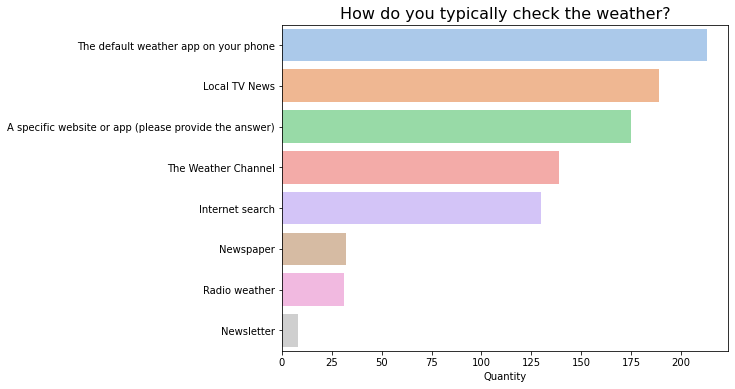

In [42]:
df2 = df.drop(df[df['How do you typically check the weather?'] == '-'].index)
plt.figure(figsize=(8,6))
sns.countplot(y ='How do you typically check the weather?', data = df2, 
              order = df2['How do you typically check the weather?'].value_counts().index, palette = 'pastel')
plt.xlabel('Quantity')
plt.ylabel('')
plt.title('How do you typically check the weather?', size = 16)
plt.show()
              